 ### MAX_FLOW MIN_COST ###
 Finds the maximum flow from the source to the well but minimizes the cost of transportation.
 
 *  Functions: max_flow_min_cost, &nbsp;  cost_of_flow, &nbsp; maximum_flow &nbsp; and &nbsp; maximum_flow_value
 *  Edge labeling for capacities, flows and unit costs for  individual pipes 
 
 

In [1]:
# INIT
import networkx as nx
%matplotlib inline   
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import random as rnd
import warnings   
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# CREATE A NETWORK

plt.rcParams["figure.figsize"] = [8, 3.50]    
G = nx.DiGraph()
G.add_nodes_from([
     (1, {"color": "lightgreen"}),
     (2, {"color": "lightblue"}),
     (3, {"color": "lightblue"}),
     (4, {"color": "lightblue"}), 
     (5, {"color": "lightblue"}),
     (6, {"color": "lightblue"}),
     (7, {"color": "orange"}),
     ])
# Node positions
ps = {1:(0, 0), 2:(2, -0.4), 3:(2, 0.4), 4:(4, 0), \
      5:(8, 0.4,), 6:(8, -0.4), 7:(6, 0), }
# Let's collect the colors into a list of dictionary values 'ncols' )
ncols = nx.get_node_attributes(G, 'color').values()  
#print(ncols)
#print(list(ncols))

G.add_edges_from([
        (1, 2, {"capacity": 12, "weight": 4}),
        (1, 3, {"capacity": 20, "weight": 6}),
        (2, 3, {"capacity":  6, "weight":-3}),
        (2, 6, {"capacity": 14, "weight": 1}),
        (3, 4, {"capacity": 90, "weight": 9}),
        (3, 5, {"capacity": 10, "weight": 5}),
        (4, 2, {"capacity": 19, "weight":13}),
        (4, 5, {"capacity":  4, "weight": 0}),
        (5, 7, {"capacity": 28, "weight": 2}),
        (6, 5, {"capacity": 11, "weight": 1}),
        (6, 7, {"capacity": 50, "weight": 8}),
        (7, 4, {"capacity":  6, "weight": 6}),
    ])

# Collect edge capacities and unit prices into dictionaries:
edge_capacity = nx.get_edge_attributes(G,'capacity')
edge_weight = nx.get_edge_attributes(G,'weight')       # Single pipe unit prices of transport 
# print(G.edges)
#print(edge_weight)

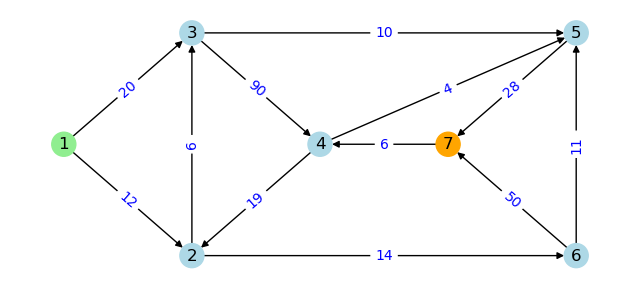

                                Capacities of pipeline pipes


In [5]:
# DRAW THE NETWORK with only capacities on the edge labels
nx.draw_networkx(G,
        pos=ps,                       # Node positions
        node_color=ncols,   
        font_color= 'k',              # For nodes
        with_labels=True,)

# Edge labels are drawn in a different command
nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = edge_capacity, font_color='b')

plt.axis("off")                       # No frames                               
plt.show()
print('                                Capacities of pipeline pipes')

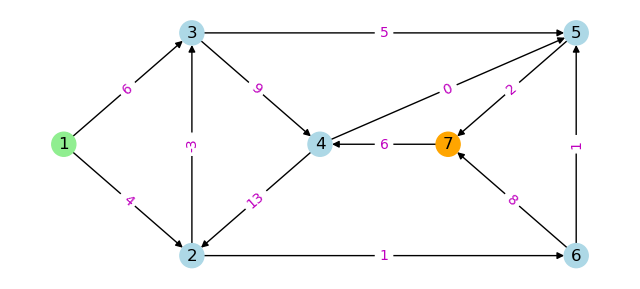

                                  Unit prices of transport in tubes


In [8]:
# DRAW THE NETWORK with only unit prices (= weights) in pipes 
nx.draw_networkx(G,
        pos=ps,                          # Node positions
        node_color=ncols,   
        font_color= 'k',    
        with_labels=True,)

# Edge labels are drawn in a different command
nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = edge_weight, font_color='m')

plt.axis("off")                                  
plt.show()
print('                                  Unit prices of transport in tubes')

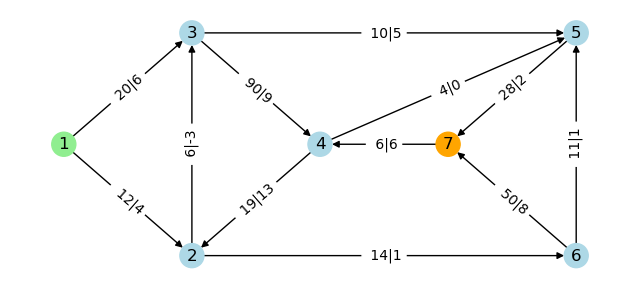

                                    Capacity | Unit price


In [10]:
# DRAW THE NETWORK: capacity and unit price of pipes on the same label
nx.draw_networkx(G,
        pos=ps,                            # Nodepositions
        node_color=ncols,        
        font_color= 'k',                   # For nodes
        with_labels=True,)

# Create edgelabels as a dictionary 'elabs', where key is a edge and..
# the value is its 'capacity|unit price':
elabs = (dict([((u,v), f' {edge_capacity[u,v]}|{edge_weight[u,v]}') \
                          for u,v in G.edges]))
""" f' ....':
A formatted string literal or f-string is a string literal that is prefixed
with 'f' or 'F'. These strings may contain replacement fields, which are
expressions delimited by curly braces {}. While other string literals
always have a constant value, formatted strings are really expressions
evaluated at run time.
"""
# print(elabs)

# Edge labels are drawn in a different command
nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = elabs, font_color='k') 
plt.axis("off")                                        
plt.show()
print('                                    Capacity | Unit price')

In [11]:
# CALCULATING max_flow min_cost

mincostFlow = nx.max_flow_min_cost(G, 1, 7)        # Out: dictionary
mincost = nx.cost_of_flow(G, mincostFlow)          # The minimum price of the transport

from networkx.algorithms.flow import maximum_flow  # Dijkstran maxFlow funktio
maxFlow = maximum_flow(G, 1, 7)[1]                 # [1]: The total flow value is omitted

# The value of the total flow in the minimum cost solution:
mincostFlowValue = sum((mincostFlow[u][7] for u in G.predecessors(7))) - sum(
    (mincostFlow[7][v] for v in G.successors(7))
)  

print('Maximum flow with Dijkstra algorithm without price minimization,:')
print('maximum_flow_value:', nx.maximum_flow_value(G, 1, 7))
print('maximum_flow', maximum_flow(G, 1, 7))       # Dijkstra's max flow for comparison
print('maxFlow', maxFlow)                          # Same as above without total flow value
print()
print('Price-minimized maximum flow:')
print('mincostFlowValue:', mincostFlowValue)
print('mincostFlow:', mincostFlow)                 # Pipe flows in the solution
print('mincost=' ,mincost)                         # The total price of the solution flow


Maximum flow with Dijkstra algorithm without price minimization,:
maximum_flow_value: 28
maximum_flow (28, {1: {2: 12, 3: 16}, 2: {3: 4, 6: 14}, 3: {4: 10, 5: 10}, 4: {2: 6, 5: 4}, 5: {7: 14}, 6: {5: 0, 7: 14}, 7: {4: 0}})
maxFlow {1: {2: 12, 3: 16}, 2: {3: 4, 6: 14}, 3: {4: 10, 5: 10}, 4: {2: 6, 5: 4}, 5: {7: 14}, 6: {5: 0, 7: 14}, 7: {4: 0}}

Price-minimized maximum flow:
mincostFlowValue: 28
mincostFlow: {1: {2: 12, 3: 16}, 2: {3: 0, 6: 14}, 3: {4: 6, 5: 10}, 4: {2: 2, 5: 4}, 5: {7: 25}, 6: {5: 11, 7: 3}, 7: {4: 0}}
mincost= 373


In [12]:
# UPDATE THE EDGE LABELS TO CORRESPOND TO THE SOLUTION FLOW  
# Prepare a dictionary for pipe flows:
edge_flow = {}
for e in G.edges:
    edge_flow[e]=0
# Updating the values of the 'edge_flow' dictionary with the calculated flows from...
# the 'mincostFlow' dictionary printed by the calculation function (has a different format)
for (u, v) in edge_flow:
    edge_flow[(u, v)]=mincostFlow[u][v]  
    #print(flow_dict[1][3])  # The calculated flow of a single Edge
# Now 'edge_flow' is ready to be fed into edgelabels for the draw function
print('edge_flow:', edge_flow)   

edge_flow: {(1, 2): 12, (1, 3): 16, (2, 3): 0, (2, 6): 14, (3, 4): 6, (3, 5): 10, (4, 2): 2, (4, 5): 4, (5, 7): 25, (6, 5): 11, (6, 7): 3, (7, 4): 0}


   Minimum cost flow = 28      Cost = 373


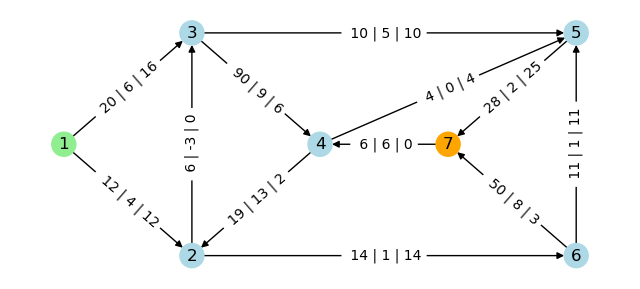

                              Capacity|Unit price|Solution flow


In [20]:
# OUTPUT: capacity, unit price of pipes and solution flow in the same label
print('   Minimum cost flow =', mincostFlowValue, '     Cost =' ,mincost,  )

nx.draw_networkx(G,
        pos=ps,                      
        node_color=ncols,             
        font_color= 'k',             
        with_labels=True,)

# Edge labels to the dictionary 'elabs', where the key is edge and..
# the value is its 'capacity|unit price|solution flow':
elabs = dict([((u,v), 
        f' {edge_capacity[u,v]} | {edge_weight[u,v]} | {edge_flow[u,v]}') 
        for u,v in G.edges])
# print(elabs)

# Draw the edge labels 
nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = elabs) 

plt.axis("off")                                      
plt.show()
print('                              Capacity|Unit price|Solution flow' )